In [4]:
using Pkg; Pkg.activate(".");
using Revise
using Statistics
import MUST
using PyPlot

MUST.@get_help_py stagger
MUST.@get_help visual 
MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2";

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost/Project.toml`


In [5]:
folder = "stagger_sun/"
model  = "t5777g44m0005";
snap_j = MUST.StaggerSnap(model, folder);

┌ Warning: bx not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: by not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: bz not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332


In [6]:
# The gas pressure is not saved in dispatch, so we use the same EOS for both to get it
eos_path = "input_data/solar_lte"
eos_path = "input_data/TSO_sun_Magg_v1"
sqEOS = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

In [7]:
b = MUST.Box(snap_j, eos=sqEOS);

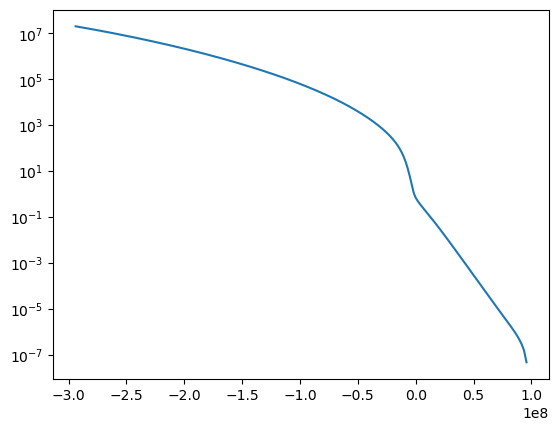

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2b2143eb8df0>

In [8]:
z = MUST.axis(b, :z)
d = MUST.plane_statistic(mean, b, :τ_ross)
plt.semilogy(z, d)

In [9]:
MUST.save(b; name="box_solar_stagger_TSO", folder="")

"box_solar_stagger_TSO.hdf5"

In [10]:
stagger_τ  = MUST.height_scale(b, :τ_ross);

Box(Float32[7.966667f8 7.9666675f8 … 7.966667f8 7.9666675f8; 7.933333f8 7.933333f8 … 7.933333f8 7.933333f8; … ; 3.3333335f6 3.3333335f6 … 3.3333335f6 3.3333335f6; 0.0 0.0 … 0.0 0.0]

Float32[7.966667f8 7.966667f8 … 7.966667f8 7.966667f8; 7.933333f8 7.933333f8 … 7.933333f8 7.933333f8; … ; 3.3333335f6 3.3333335f6 … 3.3333335f6 3.3333335f6; 0.0 0.0 … 0.0 0.0]

Float32[7.966667f8 7.966667f8 … 7.966667f8 7.966667f8; 7.933333f8 7.933333f8 … 7.933334f8 7.933333f8; … ; 3.3333335f6 3.3333338f6 … 3.3333335f6 3.3333335f6; 0.0 0.0 … 0.0 0.0]

...

Float32[7.966667f8 7.966667f8 … 7.966667f8 7.966667f8; 7.933333f8 7.933333f8 … 7.933334f8 7.933333f8; … ; 3.3333335f6 3.3333335f6 … 3.3333335f6 3.3333335f6; 0.0 0.0 … 0.0 0.0]

Float32[7.966667f8 7.966667f8 … 7.966667f8 7.966667f8; 7.933333f8 7.933333f8 … 7.933333f8 7.933333f8; … ; 3.3333338f6 3.3333335f6 … 3.3333335f6 3.3333335f6; 0.0 0.0 … 0.0 0.0]

Float32[7.966667f8 7.966667f8 … 7.966667f8 7.966667f8; 7.933333f8 7.933333f8 … 7.933333f8 7.933334f8; … 

In [11]:
MUST.save(stagger_τ; name="box_solar_stagger_TSO_t", folder="")

"box_solar_stagger_TSO_t.hdf5"